#    Week 2 Assignment

Dataset on League of Legends

'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald'

    0 indicates that neither team got it
    1 indicates team 1 got the first X, 
    2 indicates team 2 got the X,
    

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import json

data = pd.read_csv("../week-2-project-renazhong/league-of-legends/games.csv")
data.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [136]:
def idToName(ID, dic):
    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

In [137]:
jDict = pd.read_json('../week-2-project-renazhong/league-of-legends/champion_info_2.json')
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.head()

,id,key,name,tags,title
Aatrox,266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,84,Akali,Akali,[Assassin],the Fist of Shadow
Alistar,12,Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [138]:
spellJson = pd.read_json('../week-2-project-renazhong/league-of-legends/summoner_spell_info.json')
spellInfo = pd.read_json((spellJson['data']).to_json(),orient='index')
spellInfo.head()


,description,id,key,name,summonerLevel
1,Removes all disables (excluding suppression an...,1,SummonerBoost,Cleanse,6
11,Deals 390-1000 true damage (depending on champ...,11,SummonerSmite,Smite,10
12,"After channeling for 4.5 seconds, teleports yo...",12,SummonerTeleport,Teleport,6
13,Restores 50% of your champion's maximum Mana. ...,13,SummonerMana,Clarity,1
14,"Ignites target enemy champion, dealing 70-410 ...",14,SummonerDot,Ignite,10


In [139]:
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,key,name,tags,title
id,,,,
266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
84,Akali,Akali,[Assassin],the Fist of Shadow
12,Alistar,Alistar,"[Tank, Support]",the Minotaur
32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [140]:
champs = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
bans = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]
sumspells = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

In [141]:
for c in champs:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

for c in bans:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo)) 

for c in sumspells:
    data[c] = data[c].apply(lambda x: idToName(x, spellInfo))

In [142]:
champInfo.set_index(['name'],inplace=True)

In [144]:
for col in champs:
    data[col + '_tags'] = data[col].apply(lambda x: getTag(x, champInfo))
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


I reused this code from the public kernal linked here: https://www.kaggle.com/sblack/league-of-legends-data-analysis-76fe8e to recode different champion id's. tags, and spells to their names.

In [145]:
del data['creationTime']

In [146]:
del data['seasonId']

In [147]:
del data['gameId']

In [148]:
data['gameDuration (Minutes)'] = league.gameDuration/60.0

In [149]:
data.dtypes

gameDuration                int64
winner                      int64
firstBlood                  int64
firstTower                  int64
firstInhibitor              int64
firstBaron                  int64
firstDragon                 int64
firstRiftHerald             int64
t1_champ1id                object
t1_champ1_sum1             object
t1_champ1_sum2             object
t1_champ2id                object
t1_champ2_sum1             object
t1_champ2_sum2             object
t1_champ3id                object
t1_champ3_sum1             object
t1_champ3_sum2             object
t1_champ4id                object
t1_champ4_sum1             object
t1_champ4_sum2             object
t1_champ5id                object
t1_champ5_sum1             object
t1_champ5_sum2             object
t1_towerKills               int64
t1_inhibitorKills           int64
t1_baronKills               int64
t1_dragonKills              int64
t1_riftHeraldKills          int64
t1_ban1                    object
t1_ban2       

keep game id, convert game duration into minutes (new col), 
change winner, first blood, first tower etc. into object

## Histograms and Dataset Background

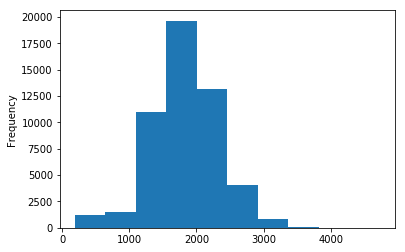

In [150]:
data['gameDuration'].plot.hist()

This histogram shows us the distribution of game duration (in seconds). We can see that most games fall around 2000 seconds long and that more games tend to over 2000 seconds rather than under 2000 seconds long. 

Text(0, 0.5, 'Concentration')

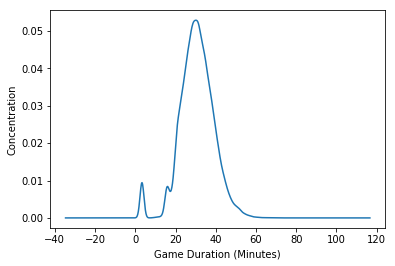

In [151]:
data['gameDuration (Minutes)'].plot.kde()
plt.xlabel("Game Duration (Minutes)")
plt.ylabel("Concentration")

The KDE chart shows that the average game duration (in minutes) falls around 30 minutes.
The reason there is a spike around 3 minutes is that there is an option to remake the game in the case that any of the team players go 'afk' and don't play the game. The reason there is significantly less games that last from 5-10 minutes is because the option to surrender the game does not come up until 15 minutes into the game. From 15 to 20 mimutes, all team members must vote yes to the surrender, whereas after 20 minutes, only 70% of the team must vote yes. This is most likely the reason between the small dip in the graph around 20 minutes, since surrendering after 20 minutes is easier and does not require everyone on the team to vote yes.

In [152]:
data.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,gameDuration (Minutes)
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,1832.362808,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,0.731676,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105,30.539380
std,512.017696,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,0.822526,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151,8.533628
min,190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166667
25%,1531.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,25.516667
50%,1833.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,30.550000
75%,2148.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,35.800000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,78.800000


From this summary statistics table, we can see that the average length of games are 30.5 minutes long.
The shortest game lasted only 3.17 minutes while the longegest in this dataset was 78.8 minutes long.

For team 1 and 2's number of dragon kills, we can see that the max number of dragons killed were 6 because only 6 dragons spawn in the duration of the game, and the average number of dragons killed are around 1.

## Visualizations

### Summoner Spells

Text(0.5, 0, 'Summoner Spell')

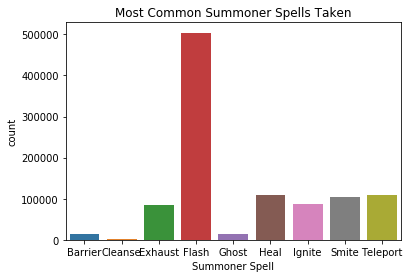

In [164]:
spellsTotals = data[sumspells].apply(pd.value_counts)
spellsTotals['count'] = spellsTotals[sumspells].sum(axis=1)

sns.barplot(x=spellsTotals.index,y=spellsTotals['count'])
plt.title("Most Common Summoner Spells Taken")
plt.xlabel("Summoner Spell")

This barplot shows the most common summoner spells that are taken. Flash is most common, and cleanse is least common.

### Champion Picks and Bans

Text(0.5, 1.0, 'Champion Bans')

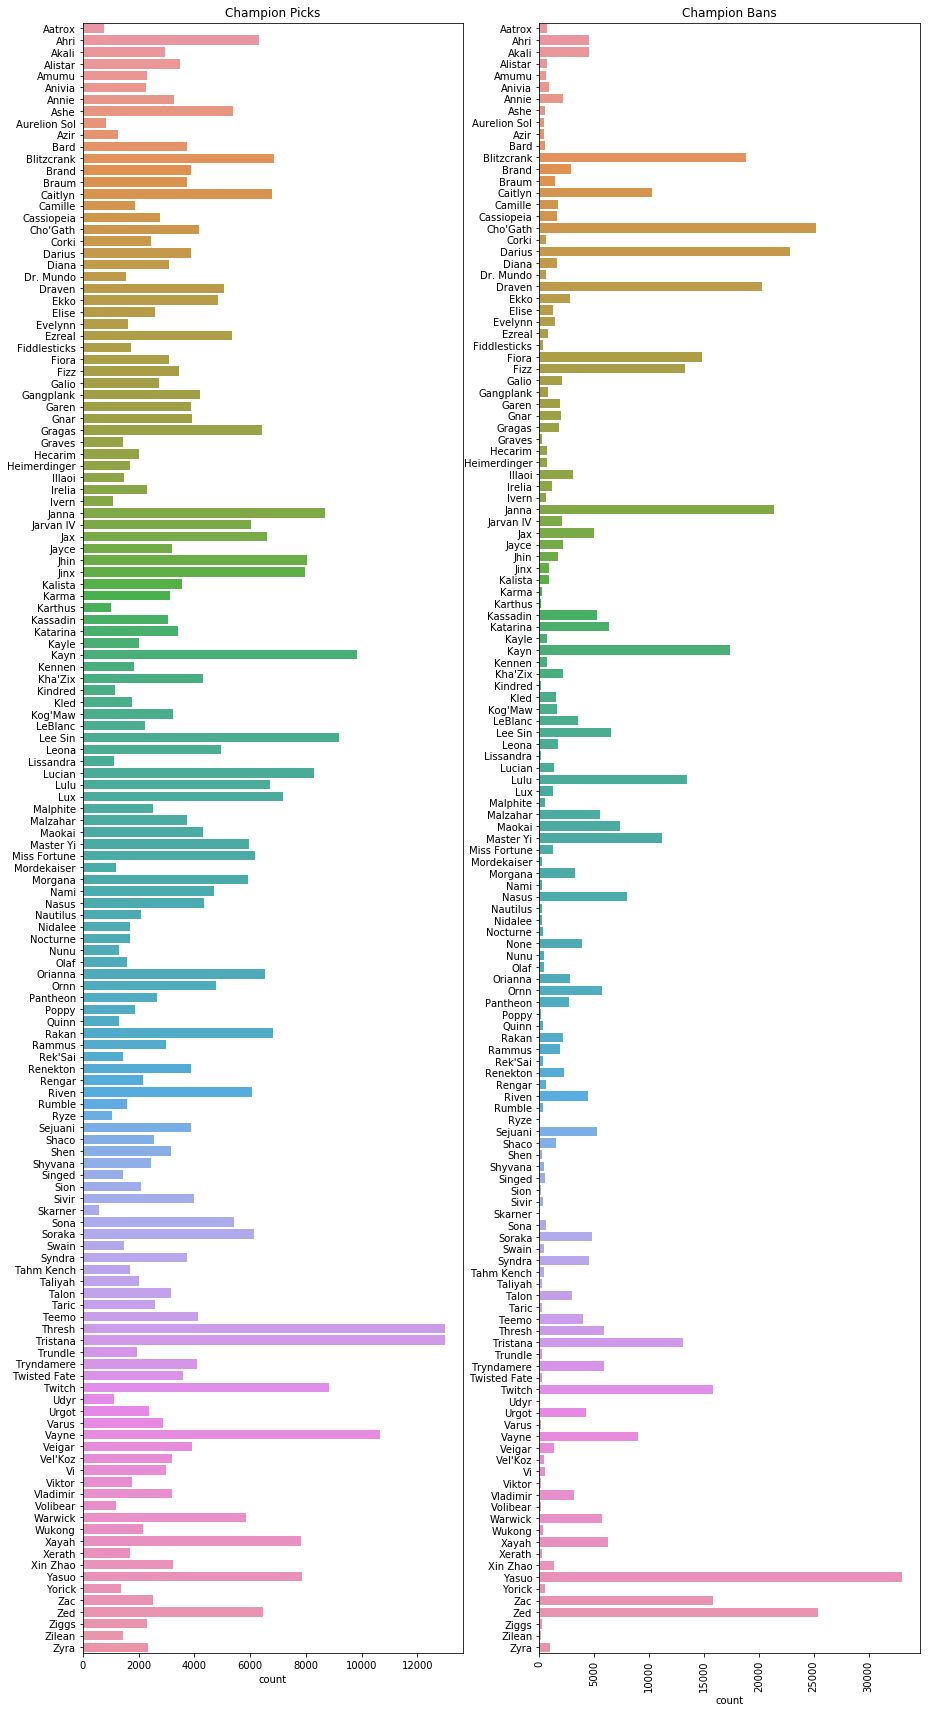

In [186]:
picks = pd.concat([data['t1_champ1id'],data['t1_champ2id'],data['t1_champ3id'],data['t1_champ4id'],data['t1_champ5id'],
                      data['t2_champ1id'],data['t2_champ2id'],data['t2_champ3id'],data['t2_champ4id'],data['t2_champ5id']],
                      ignore_index=True)
sortedpicks = sorted(picks)
bans = pd.concat([data['t1_ban1'],data['t1_ban2'],data['t1_ban3'],data['t1_ban4'],data['t1_ban5'],
                     data['t2_ban1'],data['t2_ban2'],data['t2_ban3'],data['t2_ban4'],data['t2_ban5']],
                     ignore_index=True)
sortedbans = sorted(bans)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)

sns.countplot(y=sortedpicks, data=data, ax=ax1)
sns.countplot(y=sortedbans, data=data, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

We can see that the most popular champion picks are Thresh and Tristana, and the most banned champions are Yasuo and Zed.